In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [49]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [25]:
# Преобразование столбца "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d', errors='coerce')

# Проверка изменений в типе данных
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [27]:
grouped_df = df.groupby('Дата').sum()['Количество']
grouped_df

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64

Вывести несколько первых строк сгруппированных данных

In [19]:
grouped_df.head()

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

Нарисуйте график продаж у `grouped_df`

<function matplotlib.pyplot.show(close=None, block=None)>

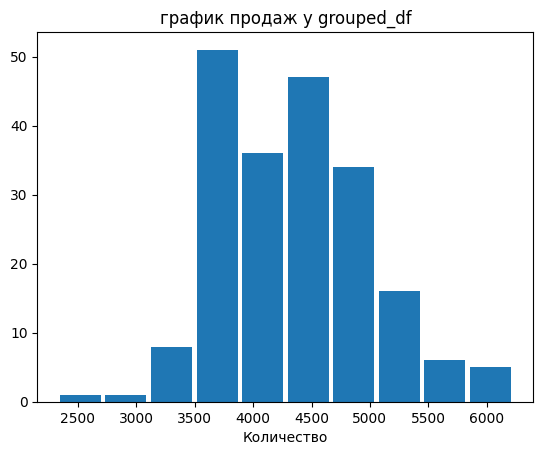

In [22]:
plt.hist(grouped_df, rwidth = 0.9 )
plt.title('график продаж у grouped_df')
plt.xlabel('Количество')
plt.show

Опишите что вы видите на графике. Ваша задача - максимально описать график

- По оси X (горизонтальная ось) отложены значения количества проданных товаров, сгруппированных по дате. Значения варьируются от около 2500 до 6000.
- По оси Y (вертикальная ось) показано количество дат, для которых соответствуют значения продаж.
- График имеет явно выраженную центральную часть, где наибольшее количество дней имело объемы продаж в диапазоне от 3500 до 5000.
- Пик наблюдается на уровне около 3500–4000 продаж за день, где насчитывается более 50 дат.
- Видна симметрия вокруг среднего значения, что указывает на то, что распределение продаж за даты имеет нормальный или близкий к нормальному характер.
- Меньшие объемы продаж (2500–3000 и 5500–6000) наблюдаются реже — их частота значительно ниже.
  
Этот график позволяет сделать вывод о том, что в большинстве случаев продажи находятся в диапазоне 3500–5000, а более низкие и высокие объемы продаж случаются реже.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [24]:
# Calculate IQR (Interquartile Range) to find the outliers
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# Find the row with the maximum outlier value
max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

max_outlier_row

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [26]:
# Filter for records in June, July, August, on Wednesdays, and at store 3
df_filtered = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.weekday == 2) & (df['Склад'] == 3)]

# Group by product and sum the sales
top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().idxmax()
top_product_quantity = df_filtered.groupby('Номенклатура')['Количество'].sum().max()

top_product, top_product_quantity

('product_1', 2267)

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [9]:

weather_df = pd.read_excel('weather_data.xlsx')



In [11]:
weather_df.head()

,Местное время в Астане,Температура
0,31.08.2018 23:00,8.2
1,31.08.2018 20:00,9.6
2,31.08.2018 17:00,11.3
3,31.08.2018 14:00,12.3
4,31.08.2018 11:00,13.2


In [35]:
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'])

# Step 4: Extract the date part
weather_df['Дата'] = weather_df['Местное время в Астане'].dt.date

# Step 5: Group by date and calculate average temperature
daily_avg_temp = weather_df.groupby('Дата')['Температура'].mean().reset_index()

# Step 6: Display result
print(daily_avg_temp)

           Дата  Температура
0    2018-01-01      -9.4625
1    2018-01-02      -9.5125
2    2018-01-03     -11.4625
3    2018-01-04     -14.0750
4    2018-01-05     -16.8625
..          ...          ...
238  2018-08-27      12.5250
239  2018-08-28      14.1125
240  2018-08-29      13.8250
241  2018-08-30      14.1750
242  2018-08-31      11.0250

[243 rows x 2 columns]


In [37]:
daily_avg_temp.rename(columns={'Температура': 'T'}, inplace=True)

daily_avg_temp

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625
...,...,...
238,2018-08-27,12.5250
239,2018-08-28,14.1125
240,2018-08-29,13.8250
241,2018-08-30,14.1750


In [47]:
# Преобразуем столбец 'Дата' в datetime
daily_avg_temp['Дата'] = pd.to_datetime(daily_avg_temp['Дата'], format='%d.%m.%Y')

# Теперь выполняем слияние по дате
merged_df = pd.merge(grouped_df, daily_avg_temp, on='Дата', how='inner')

merged_df

,Дата,Количество,T
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500
...,...,...,...
200,2018-08-26,5302,11.9750
201,2018-08-28,5983,14.1125
202,2018-08-29,4969,13.8250
203,2018-08-30,4648,14.1750


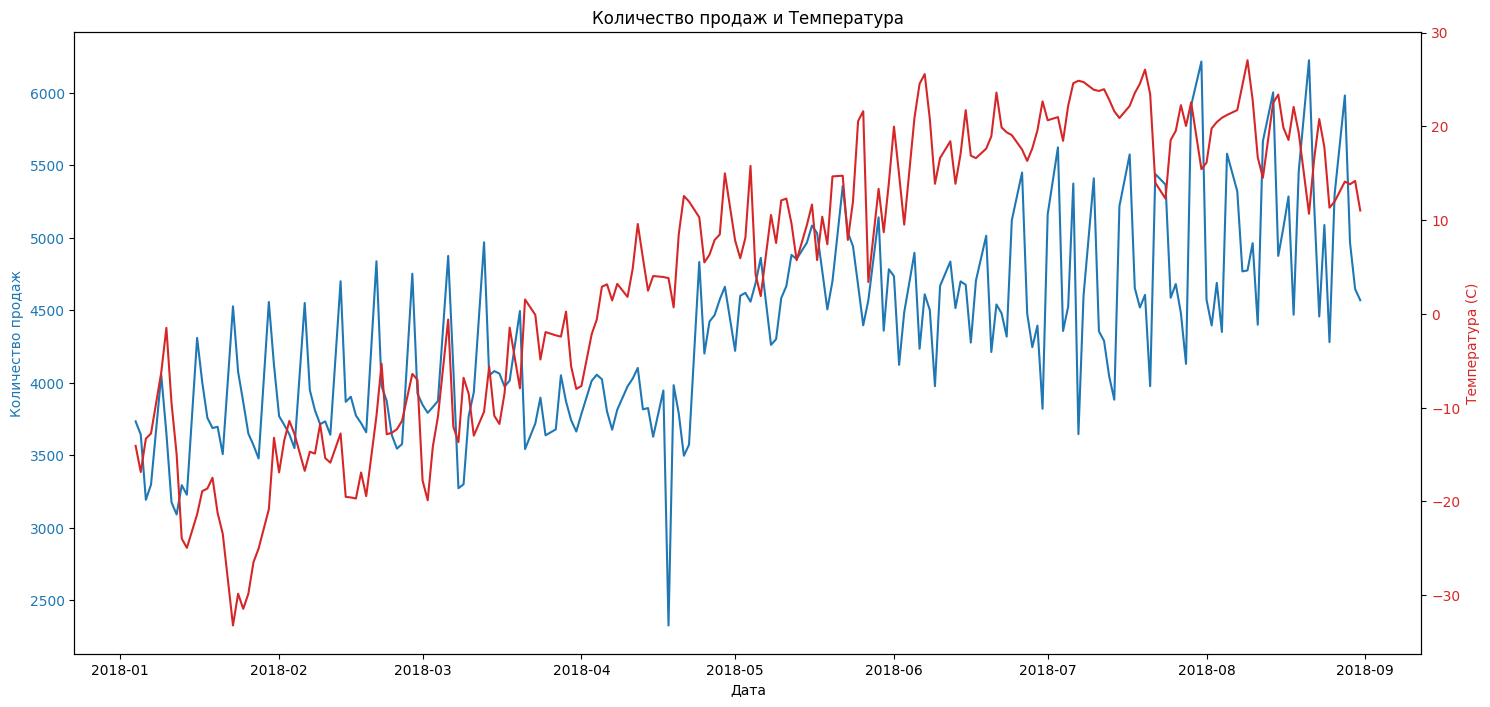

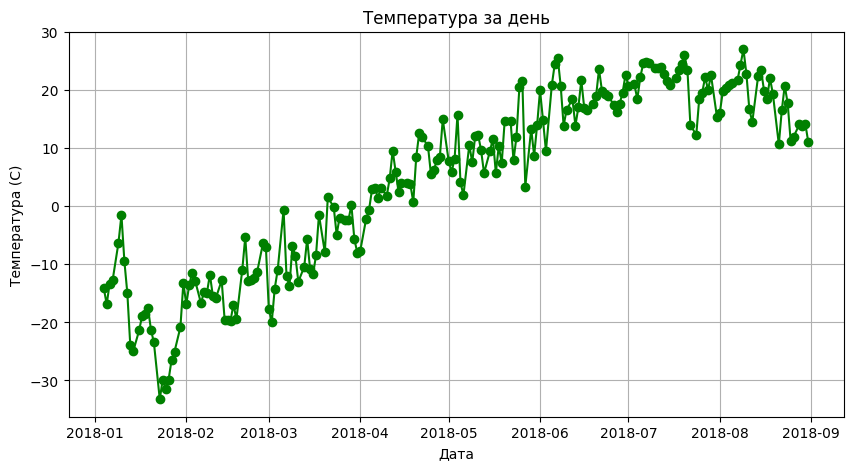

In [65]:
# Построение графика 'Количество продаж' и 'T' (температура)
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(15, 7))

# График количества продаж
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='tab:blue', label='Количество продаж')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# График температуры
ax2 = ax1.twinx()
ax2.set_ylabel('Температура (C)', color='tab:red')
ax2.plot(merged_df['Дата'], merged_df['T'], color='tab:red', label='Температура')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Показываем график
fig.tight_layout()
plt.title("Количество продаж и Температура")
plt.show()

# Отдельный график температуры
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Дата'], merged_df['T'], color='green', marker='o')
plt.title('Температура за день')
plt.xlabel('Дата')
plt.ylabel('Температура (C)')
plt.grid(True)
plt.show()
